In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration du style graphique
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

# Ignorer les avertissements inutiles
warnings.filterwarnings('ignore')

In [34]:
def load_and_clean_data(filepath):
    try:
        df = pd.read_csv(filepath, sep=';', encoding='latin1')
        print("Fichier chargé avec succès.")
    except:
        df = pd.read_csv(filepath, sep=';')
        print("Fichier chargé avec encodage par défaut.")

    # Correction des types numériques (Virgule -> Point)
    numeric_cols = ['Total Charges', 'Monthly Charges', 'Latitude', 'Longitude']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace(',', '.')
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Gestion des NaN (Lignes vides dans Total Charges)
    initial_shape = df.shape
    df.dropna(subset=['Total Charges'], inplace=True)
    print(f"Lignes supprimées (NaN) : {initial_shape[0] - df.shape[0]}")

    # Encodage de la cible pour l'analyse (Yes=1, No=0)
    # Cela permet de calculer des moyennes de churn facilement
    df['Churn Value'] = df['Churn Label'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Harmonisation Senior Citizen
    df['Senior Citizen'] = df['Senior Citizen'].astype(str).replace({'1': 'Yes', '0': 'No'})

    return df

# Exécution
df = load_and_clean_data('Telco_customer_churn.xlsx')

# Aperçu
print("\n--- Infos du DataFrame ---")
df.info()
display(df.head())

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 16: invalid start byte

In [36]:
def process_data_from_excel(filename):
    try:
        df = pd.read_excel(filename)
        print("Fichier Excel chargé avec succès.")
    except Exception as e:
        print(f"Erreur lors du chargement. Vérifiez le nom du fichier.\nErreur : {e}")
        return None

    df_clean = df.copy()

    df_clean['Total Charges'] = pd.to_numeric(df_clean['Total Charges'], errors='coerce')

    # Suppression des valeurs manquantes (NaN)
    initial_rows = df_clean.shape[0]
    df_clean.dropna(subset=['Total Charges'], inplace=True)
    rows_dropped = initial_rows - df_clean.shape[0]
    print(f"{rows_dropped} lignes supprimées (valeurs vides ou invalides).")

    # Normalisation des colonnes numériques (Latitude/Longitude/Monthly)
    numeric_cols = ['Monthly Charges', 'Latitude', 'Longitude']
    for col in numeric_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

    # Harmonisation de 'Senior Citizen'
    if df_clean['Senior Citizen'].dtype != 'object':
        df_clean['Senior Citizen'] = df_clean['Senior Citizen'].replace({0: 'No', 1: 'Yes'})
        df_clean['Senior Citizen'] = df_clean['Senior Citizen'].astype(str)

    # Création de la Churn Value si elle n'existe pas (pour l'analyse)
    if 'Churn Value' not in df_clean.columns and 'Churn Label' in df_clean.columns:
        df_clean['Churn Value'] = df_clean['Churn Label'].apply(lambda x: 1 if x == 'Yes' else 0)

    print(f"Nettoyage terminé. Dimensions finales : {df_clean.shape}")
    return df_clean

filename = "Telco_customer_churn.xlsx"

df = process_data_from_excel(filename)

# Aperçu
if df is not None:
    display(df.head())
    print(df.info())

Fichier Excel chargé avec succès.
11 lignes supprimées (valeurs vides ou invalides).
Nettoyage terminé. Dimensions finales : (7032, 33)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   int64  
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Service   7032 non-n

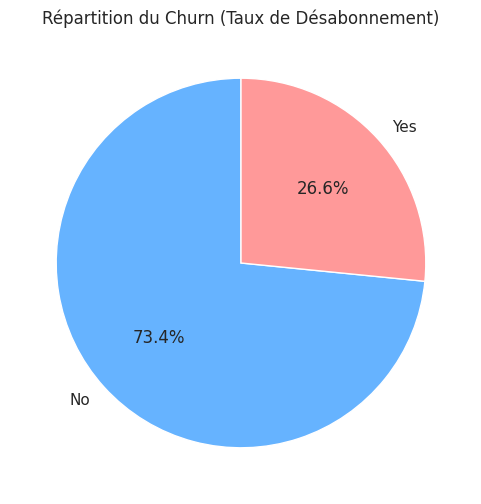

Le taux de Churn est de 26.58%.
C'est un dataset déséquilibré (imbalanced). Pour la modélisation, la métrique 'Accuracy' seule sera trompeuse.
Il faudra privilégier le F1-Score ou l'AUC.


In [38]:
# Analyse du churn (variable cible)

churn_counts = df['Churn Label'].value_counts()
churn_rate = (churn_counts / len(df)) * 100

plt.figure(figsize=(6, 6))
plt.pie(churn_rate, labels=churn_rate.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Répartition du Churn (Taux de Désabonnement)")
plt.show()

print(f"Le taux de Churn est de {churn_rate['Yes']:.2f}%.")
print("C'est un dataset déséquilibré (imbalanced). Pour la modélisation, la métrique 'Accuracy' seule sera trompeuse.")
print("Il faudra privilégier le F1-Score ou l'AUC.")

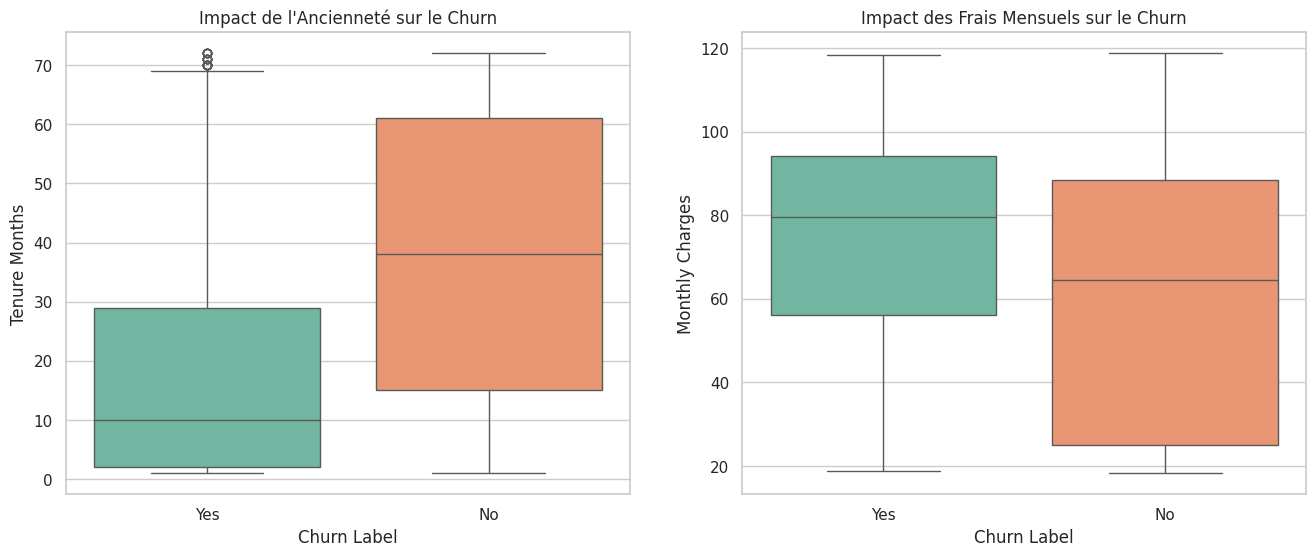

1. Ancienneté : Les clients qui partent (Yes) ont une ancienneté beaucoup plus faible (médiane ~10 mois)
   que ceux qui restent (médiane ~38 mois). Les nouveaux clients sont les plus fragiles.
2. Prix : Les clients qui partent paient en moyenne plus cher par mois.
   Conclusion : Un prix élevé combiné à une faible ancienneté est un facteur de risque majeur.


In [39]:
# Impact de l'ancienneté et du prix

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ancienneté (Tenure)
sns.boxplot(x='Churn Label', y='Tenure Months', data=df, ax=axes[0], palette="Set2")
axes[0].set_title("Impact de l'Ancienneté sur le Churn")

# Charges Mensuelles
sns.boxplot(x='Churn Label', y='Monthly Charges', data=df, ax=axes[1], palette="Set2")
axes[1].set_title("Impact des Frais Mensuels sur le Churn")

plt.show()

print("1. Ancienneté : Les clients qui partent (Yes) ont une ancienneté beaucoup plus faible (médiane ~10 mois)")
print("   que ceux qui restent (médiane ~38 mois). Les nouveaux clients sont les plus fragiles.")
print("2. Prix : Les clients qui partent paient en moyenne plus cher par mois.")
print("   Conclusion : Un prix élevé combiné à une faible ancienneté est un facteur de risque majeur.")

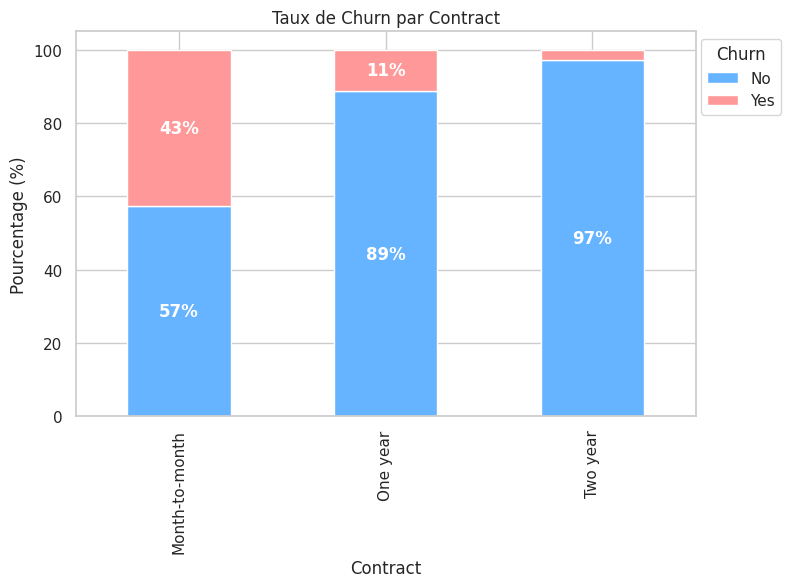

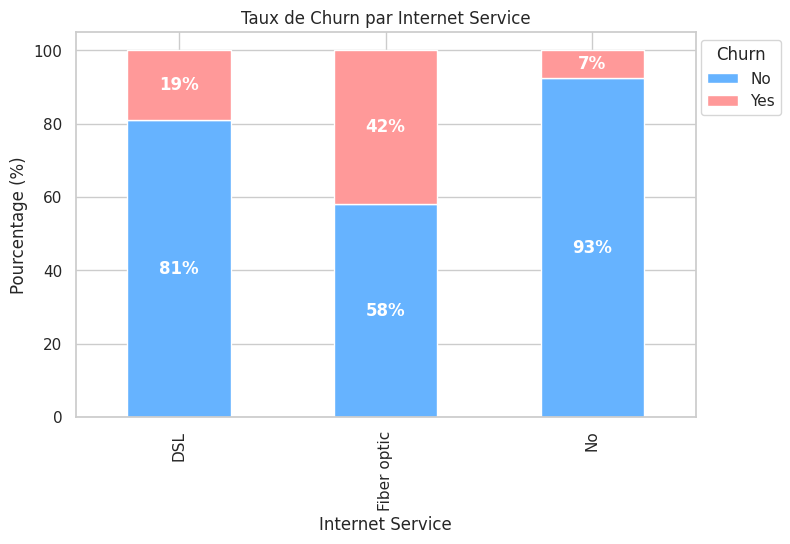

1. Contrat : Le contrat 'Month-to-month' est le pire avec ~43% de départ.
   Les contrats long terme (2 ans) fidélisent très bien (seulement ~3% de churn).
2. Internet : La 'Fiber Optic' a un taux de churn très élevé (~42%) comparé au DSL (~19%).
   Hypothèse : Problème technique sur la fibre ou prix trop élevé perçu pour ce service.


In [40]:
def plot_churn_by_category(df, column):
    # Création d'un tableau croisé normalisé
    temp = pd.crosstab(df[column], df['Churn Label'], normalize='index') * 100
    ax = temp.plot(kind='bar', stacked=True, color=['#66b3ff','#ff9999'], figsize=(8, 5))

    plt.title(f"Taux de Churn par {column}")
    plt.ylabel("Pourcentage (%)")
    plt.legend(title="Churn", loc='upper right', bbox_to_anchor=(1.15, 1))

    # Affichage des pourcentages
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 5: # Ne pas afficher si trop petit
            ax.text(x+width/2, y+height/2, '{:.0f}%'.format(height), ha='center', va='center', color='white', weight='bold')
    plt.show()

# 1. Type de Contrat
plot_churn_by_category(df, 'Contract')

# 2. Service Internet
plot_churn_by_category(df, 'Internet Service')


print("1. Contrat : Le contrat 'Month-to-month' est le pire avec ~43% de départ.")
print("   Les contrats long terme (2 ans) fidélisent très bien (seulement ~3% de churn).")
print("2. Internet : La 'Fiber Optic' a un taux de churn très élevé (~42%) comparé au DSL (~19%).")
print("   Hypothèse : Problème technique sur la fibre ou prix trop élevé perçu pour ce service.")

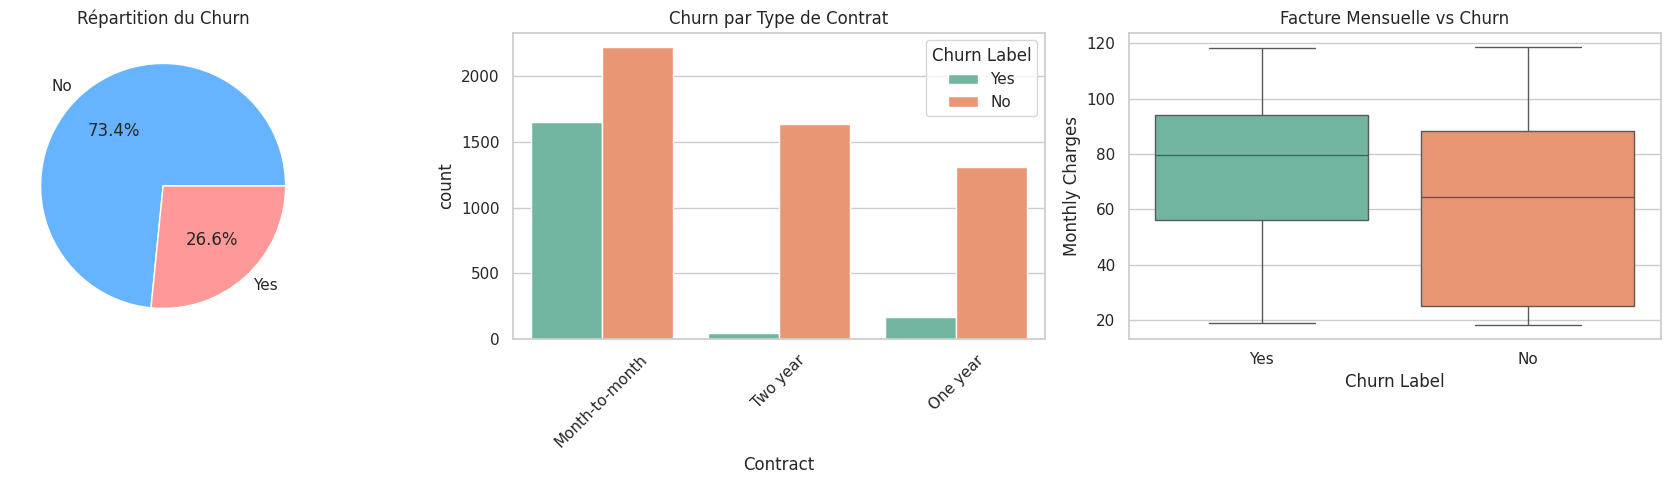

In [41]:
if df is not None:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1. Taux de Churn Global
    churn_counts = df['Churn Label'].value_counts()
    axes[0].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
    axes[0].set_title("Répartition du Churn")

    # 2. Churn par Contrat (Doit être haut pour Month-to-month)
    sns.countplot(x='Contract', hue='Churn Label', data=df, ax=axes[1], palette="Set2")
    axes[1].set_title("Churn par Type de Contrat")
    axes[1].tick_params(axis='x', rotation=45)

    # 3. Churn par Monthly Charges (Les factures élevées partent-elles plus ?)
    sns.boxplot(x='Churn Label', y='Monthly Charges', data=df, ax=axes[2], palette="Set2")
    axes[2].set_title("Facture Mensuelle vs Churn")

    plt.tight_layout()
    plt.show()
else:
    print("Pas de données à afficher.")

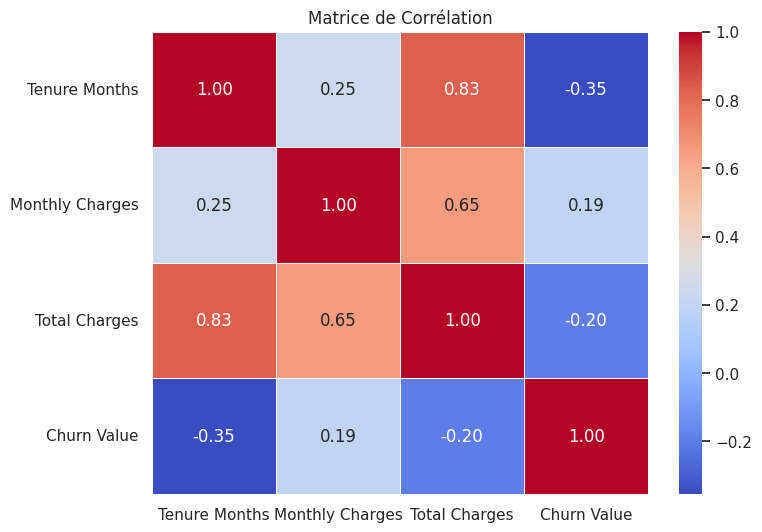

1. 'Churn Value' est inversement corrélée à 'Tenure Months' (-0.35). Plus on reste, moins on part.
2. 'Monthly Charges' et 'Total Charges' sont fortement corrélés (logique).


In [42]:
# Matrice de corrélations
corr_matrix = df[['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

print("1. 'Churn Value' est inversement corrélée à 'Tenure Months' (-0.35). Plus on reste, moins on part.")
print("2. 'Monthly Charges' et 'Total Charges' sont fortement corrélés (logique).")

In [43]:
# Sauvegarde du fichier propre pour l'app Streamlit
df.to_csv('telco_churn_cleaned.csv', index=False, sep=';', encoding='utf-8')
print("Fichier 'telco_churn_cleaned.csv' exporté avec succès.")

Fichier 'telco_churn_cleaned.csv' exporté avec succès.
